# CMSE 202 Semester Project: 

# Abstract

### Research Question: 

Can we accurately predict the type of a star using its physical properties sucha as temperature, luminosity, and radius?

### Methodologies & Reasoning

This section details the thought process and steps each team member followed in developing the questions and answers for this project. By breaking down our individual approaches, we aim to provide transparency and insight into our problem-solving methodologies.

**Team Contributions:**

- **Araynah D.**:  
  *(Description of the approach or key insights can be added here.)*

- **Palmer W.**:  
  *(Description of the approach or key insights can be added here.)*

- **Katrina S.**:  
  *(Description of the approach or key insights can be added here.)*

- **Yihan W.**:  
  *(Description of the approach or key insights can be added here.)*


# data file
The data file is generated from 'https://skyserver.sdss.org/dr18/SearchTools/sql#' using the following query: 
```brash
SELECT TOP 65000
    p.objID, p.ra, p.dec,
    p.u, p.g, p.r, p.i, p.z,
    (p.u - p.g) AS u_g,
    (p.g - p.r) AS g_r,
    (p.r - p.i) AS r_i,
    (p.i - p.z) AS i_z,
    s.z AS redshift,
    s.class, s.subclass
FROM PhotoObj AS p
JOIN SpecObj AS s
    ON p.objID = s.bestObjID
WHERE s.class = 'GALAXY'

```

- `objID` - Unique object identifier in SDSS database
- `ra` - Right Ascension, the celestial equivalent of longitude.
- `dec` - 	Declination, the celestial equivalent of latitude.
- `u` - Ultraviolet magnitude
- `g` - Green magnitude
- `r` - Red magnitude
- `i` - Near-infrared magnitude
- `z` - Infrared magnitude
- `u_g` - Difference between ultraviolet (u) and green (g) light.
- `g_r` - Difference between green (g) and red (r) light.
- `r_i` - Difference between red (r) and near-infrared (i) light.
- `i_z` - Difference between near-IR (i) and IR (z) light.
- `redshift` - the percent of the observed light from an object (galaxy) that has been stretched compared to its original (emitted) wavelength.
- `class` - Object classification
- `subclass`
    - STARFORMING: Ongoing star formation

    - STARBURST: Intense star formation

    - AGN: Active Galactic Nucleus

    - BROADLINE: AGN with broad emission lines

    - None/NaN: No subclass assigned

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import pandas as pd
from io import StringIO

with open("Skyserver_CrossID4_12_2025 6_06_46 PM.csv", 'r') as f:
    lines = [line.strip() for line in f if not line.startswith('#')]
    clean_csv = '\n'.join(lines)

df = pd.read_csv(StringIO(clean_csv), sep=',')
df_new = df.dropna()
df_new

,objID,ra,dec,u,g,r,i,z,u_g,g_r,r_i,i_z,redshift,class,subclass
5,1237648720145285449,153.306341,-0.896848,18.95948,18.13569,17.90530,17.61372,17.52285,0.823793,0.230393,0.291582,0.090864,0.062303,GALAXY,STARBURST
8,1237648720145350846,153.343355,-0.871817,18.95092,17.75390,17.22394,16.90525,16.67649,1.197025,0.529955,0.318687,0.228767,0.047484,GALAXY,STARFORMING
14,1237648720678944894,145.874449,-0.608755,18.19744,16.69651,16.01479,15.64210,15.39185,1.500925,0.681723,0.372692,0.250249,0.071590,GALAXY,STARFORMING
18,1237648720682287313,153.595670,-0.625326,17.57071,16.13495,15.39250,15.00002,14.68709,1.435757,0.742447,0.392484,0.312931,0.085927,GALAXY,STARFORMING
22,1237648721215946942,146.299839,-0.119995,17.86945,15.94067,14.97828,14.50247,14.08414,1.928787,0.962383,0.475814,0.418324,0.030704,GALAXY,AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64988,1237662238016274577,214.977375,8.905497,19.78687,18.17079,17.30154,16.87577,16.52004,1.616076,0.869249,0.425775,0.355722,0.122285,GALAXY,STARFORMING
64989,1237662238017585296,217.982977,8.637717,16.60269,15.14315,14.53520,14.18977,13.91660,1.459541,0.607952,0.345427,0.273173,0.033137,GALAXY,STARFORMING
64990,1237662238017650901,218.182467,8.605464,19.10909,18.16031,17.79346,17.46519,17.32477,0.948784,0.366850,0.328270,0.140415,0.116040,GALAXY,STARBURST
64995,1237662238017716470,218.405793,8.658590,19.76802,18.27528,17.52789,17.10510,16.79983,1.492737,0.747391,0.422792,0.305271,0.081524,GALAXY,STARFORMING


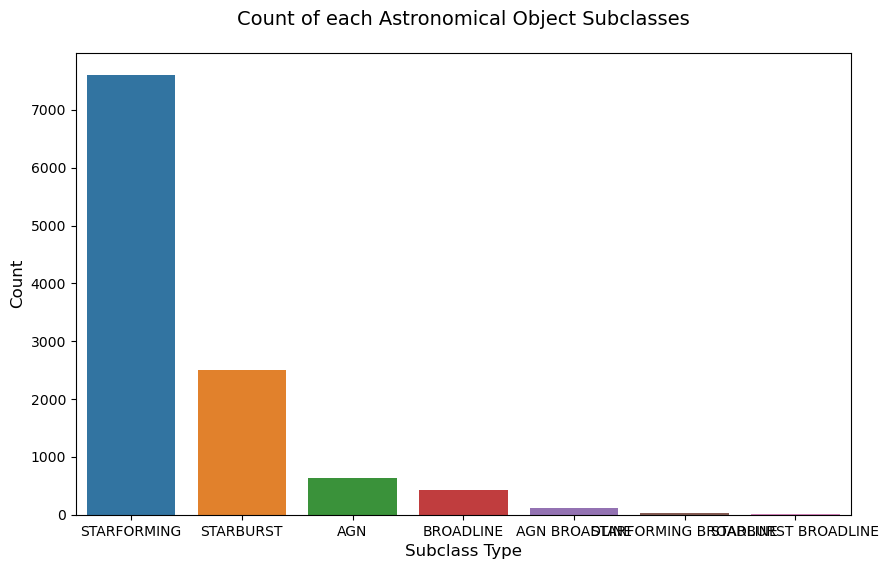

In [67]:
# create bar graph for the number of each galaxy subclass subclass

# Create a figure with a specific size (width=10 inches, height=6 inches)
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(
    x=subclass_counts.index,         # Object subclass labels (e.g., galaxy types)
    y=subclass_counts.values,        # Counts/frequencies of each subclass
    hue=subclass_counts.index,       # Color bars by subclass (uses unique colors for each category)
    dodge=False,                     # Disable automatic bar spacing (ensures single bar per category)
    legend=False                     # Hide legend (redundant since x-axis already shows labels)
)

# Add plot title and axis labels
plt.title("Count of each Astronomical Object Subclasses", fontsize=14, pad=20)
plt.xlabel("Subclass Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.show()